Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 1

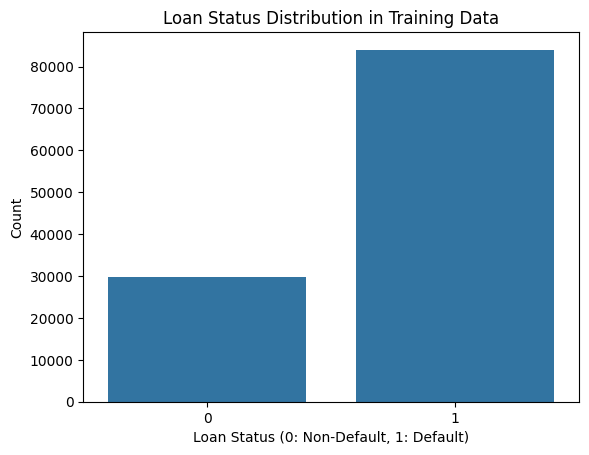

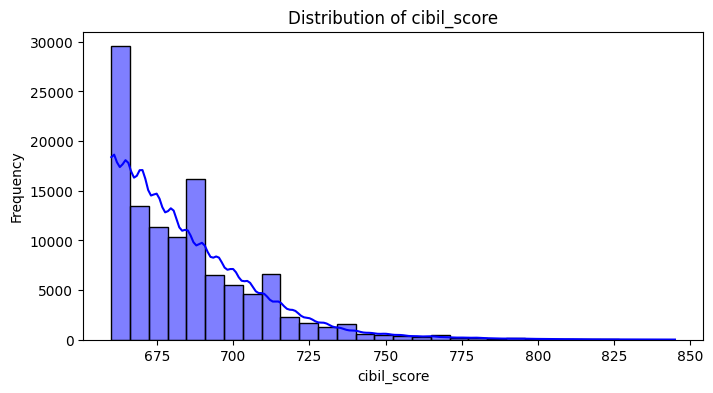

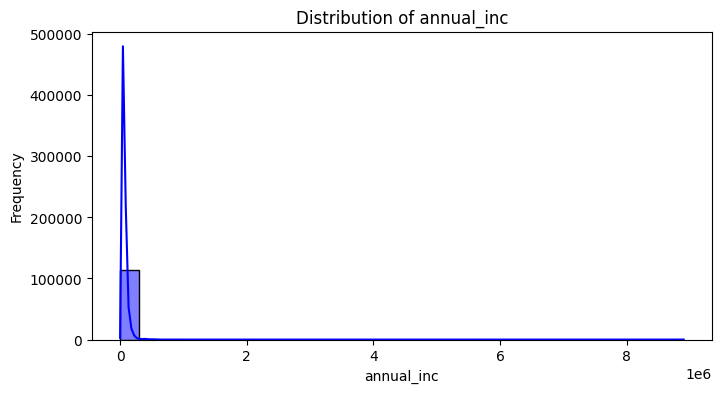

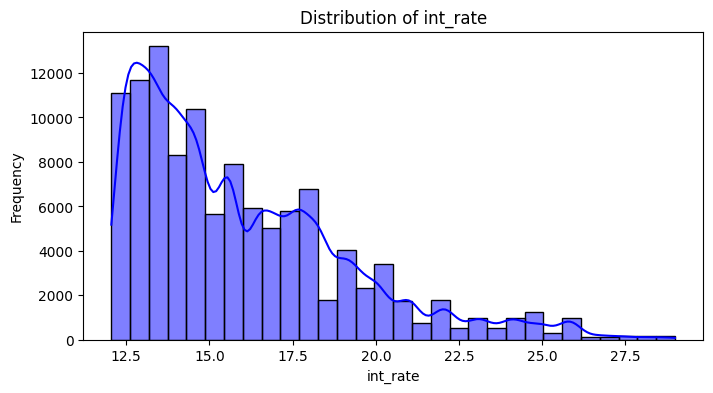

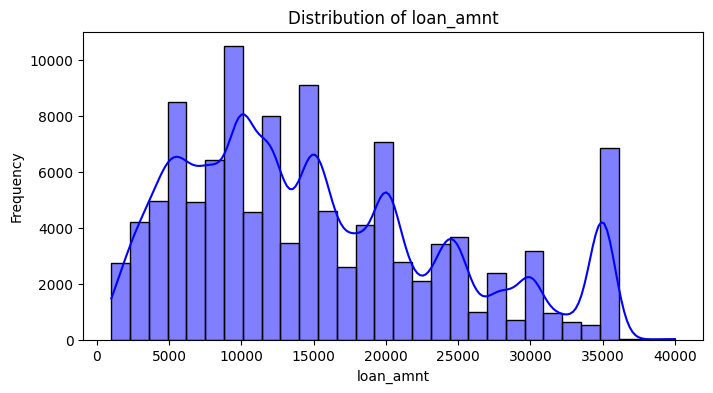

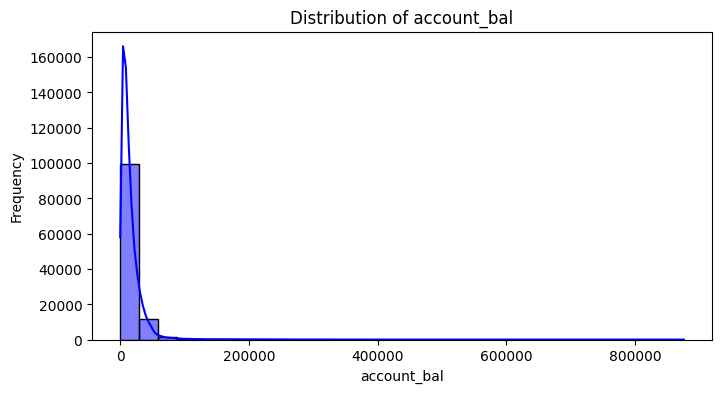

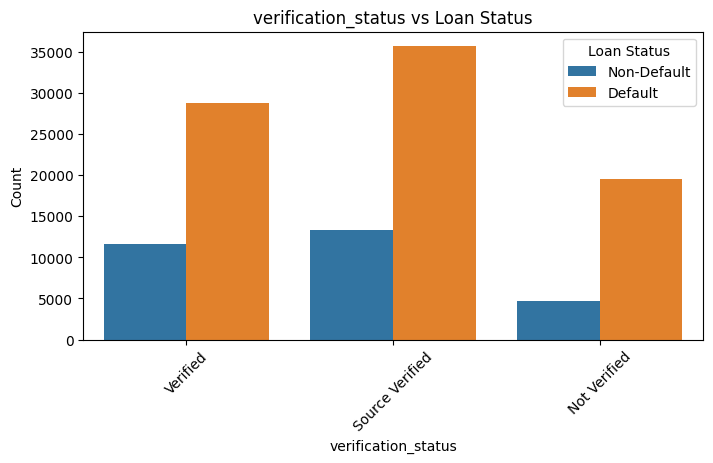

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data_path = '/content/train_data.xlsx'
test_data_path = '/content/test_data.xlsx'

train_data = pd.read_excel(train_data_path)
test_data = pd.read_excel(test_data_path)

# Display basic information about the datasets
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

# Check for missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(data=train_data, x='loan_status')
plt.title("Loan Status Distribution in Training Data")
plt.xlabel("Loan Status (0: Non-Default, 1: Default)")
plt.ylabel("Count")
plt.show()

# Analyze numeric features
numeric_features = ['cibil_score', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[feature].dropna(), kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = train_data[numeric_features + ['loan_status']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Categorical features analysis
categorical_features = ['sub_grade', 'home_ownership', 'purpose', 'application_type', 'verification_status']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_data, x=feature, hue='loan_status')
    plt.title(f"{feature} vs Loan Status")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Loan Status", labels=["Non-Default", "Default"])
    plt.show()

